In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url ="https://raw.githubusercontent.com/Anuj020/CsvFiles/main/winequality-red.csv"
wine = pd.read_csv(url)

### 1. Take a quick look at the data structure using head, info, and describe.

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 3. correlation matrix between quality and the other attributes.

In [6]:
corr_matrix = wine.corr()
corr_matrix["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [7]:
count= wine["quality"].value_counts()
count

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### 4. Split the data into 80% training set and 20% testing set, and print the shape of X_train, y_train, X_test, and   y_test.

In [8]:
from sklearn.model_selection import train_test_split

# splitting the data for train and test into 80% and 20% respectively.
feature = wine.drop("quality",axis=1) # training data
target = wine["quality"]  # testing data

X_train  ,X_test, y_train, y_test = train_test_split(feature, target,test_size=0.2)


# shapes of the train and test data
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)



X_train: (1279, 11)
y_train: (1279,)
X_test: (320, 11)
y_test: (320,)


### 5.Train a svm model (we will call it model1) to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

In [17]:
from sklearn.svm import SVC

# we create svc model with 'rbf' kernel , gamma is 1 and C is 1
model1 = SVC(kernel='rbf',gamma=1, C=1)

# train model with training data
model1.fit(X_train,y_train)

# make prediction on training data
prediction = model1.predict(X_train)
print(prediction)

[5 5 4 ... 7 5 6]


### 6.Test your model on the test set, and report the classification_report on the y_test and y_predict.

In [18]:
from sklearn.metrics import classification_report

# make prediction on testing data
y_prediction = model1.predict(X_test)

# classificationreport on testing data
print(classification_report(y_test,y_prediction,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         9
           5       0.51      0.86      0.64       133
           6       0.59      0.38      0.46       128
           7       0.91      0.25      0.39        40
           8       1.00      0.12      0.22         8

    accuracy                           0.55       320
   macro avg       0.84      0.27      0.29       320
weighted avg       0.62      0.55      0.51       320



### 7. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

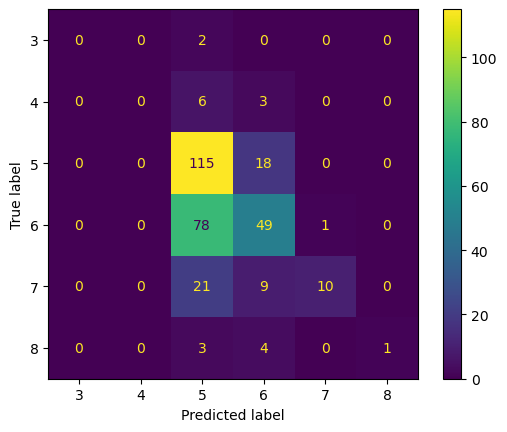

In [19]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# generating a confusion matrix for the test data
confusionMatrix = confusion_matrix(y_test,y_prediction)

# plotting the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=model1.classes_)
display.plot()


### 8. Train a svm model with the same kernel and gamma values but with a smaller value of C (e.g., C=0.01), and only report the classification_report. We will refer to this model as model2.

In [20]:
# training a model using same kerenel and gamma value but C is 0.01
model2 = SVC(kernel='rbf',gamma=1, C=0.01)

# train the model on the training data
model2.fit(X_train,y_train)

# prediction on test data 
y_prediction2 = model2.predict(X_test)

# print the classification report 
print(classification_report(y_test,y_prediction2,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         9
           5       0.42      1.00      0.59       133
           6       1.00      0.00      0.00       128
           7       1.00      0.00      0.00        40
           8       1.00      0.00      0.00         8

    accuracy                           0.42       320
   macro avg       0.90      0.17      0.10       320
weighted avg       0.76      0.42      0.24       320



### 9.Train a svm model with the same kernel and gamma values but with a larger value of C (e.g., C=10), and only report the classification_report. We will refer to this model as model3.

In [21]:
# Initializing a new model with C is 10
model3 = SVC(kernel='rbf',gamma=1,C=10)

# training model with train set
model3.fit(X_train,y_train)

# predicting model on test data
y_prediction3= model3.predict(X_test)

# printing classification report 
print(classification_report(y_test,y_prediction3,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.53      0.87      0.66       133
           6       0.59      0.41      0.48       128
           7       0.91      0.25      0.39        40
           8       1.00      0.12      0.22         8

    accuracy                           0.56       320
   macro avg       0.67      0.28      0.29       320
weighted avg       0.60      0.56      0.52       320



### 10. Evaluate model1 using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

In [16]:
from sklearn.model_selection import cross_val_score

# calculating cross validation score 
score = cross_val_score(model1,feature,target,cv=5)

print("Cross val score is :" ,score)
print("Mean of accuracy score:" , score.mean())

Cross val score is : [0.4875     0.45       0.440625   0.43125    0.44827586]
Mean of accuracy score: 0.4515301724137931


### 11. Why do you think your model is not performing well? Is it the algorithm? The data? Or something else?

The unbalanced distribution of the target variable, in this instance wine quality, might explain why the SVM models did not perform well. The quality attribute value counts suggest that the dataset includes relatively few cases of wine with extremely high or extremely poor quality, with the bulk of occurrences centred in the medium range. As a result, the model may be skewed towards the dominant class and fail to properly anticipate the minority classes.